In [539]:
#make circos plot with each TF_added and/or Promoter around the edge of the circle, with links from TFs to their target Promoters
#the links are colored in a spectrum from blue to red based on the strength of the interaction (fold_change)


In [540]:
library(circlize)
library(grid)
library(gridBase)
library(ComplexHeatmap)

In [541]:
#read in data
df <- read.table("../../../data/luminescence/coexpression_for_manuscript/coexpression_data_for_circos_plot_fold_change_significant.tsv", header = TRUE, sep = "\t")

In [542]:
#keep only the Promoter	TF_added and fold_change columns
df <- df[,c(1,2,7,8)]

In [544]:
#swap the first two columns
df <- df[, c(2,1,3:ncol(df))]

In [545]:
#filter out the rows where the signficant column is no
df <- df[df$significance != "no",]

In [546]:
df$fold_change

[1]  1.1901593 -0.8566680 -0.8020606 -0.7546274 -0.1629971 -0.8073747
  [7] -0.3269212 -0.3171026 -0.7793004 -0.2123725 -0.8691016  7.1563899
 [13] -0.8298343 -0.7306362 -0.7521343 -0.6097626 -0.4337819 -0.7562129
 [19] -0.7131023 -0.7183081 -0.7708078 -0.8446288 -0.7774338 -0.6832154
 [25] -0.6927471 -0.6215714 -0.1835185 -0.7223364 -0.8356407  0.4797370
 [31]  4.8968994 -0.7448704 -0.9076398 -0.9087164 -0.6217520 -0.9020627
 [37] -0.6132197 -0.6310560 -0.7824374  6.9617790 -0.9482410 -0.9407942
 [43] -0.5710161  6.3461372 -0.7991492  0.7389893  0.8317932  0.6884994
 [49]  0.5523843  0.9263605  0.9802862  0.8190418  1.1793858 -0.6058759
 [55]  0.5401612 -0.1680083  0.8064613 -0.1986755  1.7175297  0.6828375
 [61] -0.5624510 -0.5723753 -0.4430938 -0.5191573 -0.4084991 -0.5141428
 [67] -0.1642898 -0.1282737 -0.6746690  0.9061488  1.3571117  2.5324282
 [73]  0.9871608  4.1119778 -0.5535793 -0.7083336 -0.3187025 -0.7582532
 [79] -0.3094837 -0.1332357 -0.7642849 -0.2524621  1.8988817 -0.2549366
 [85] -0.5520019 -0.6800297 -0.7642131  1.3285401 -0.5937881 -0.6120387
 [91] -0.6621126 -0.7120211 -0.5918931 -0.7364296 -0.7252961 -0.5155878
 [97] -0.6153996 -0.7130591 -0.7089025 -0.9117834 -0.9132613 -0.5389198

In [547]:
#get highest and lowest fold change values
max_fc <- max(df$fold_change)
min_fc <- min(df$fold_change)

col_fun = colorRamp2(c(-1, 0, 7), c("orange", "lightblue", "darkblue"))
#select color based on fold_change
df$color <- col_fun(df$fold_change)


In [548]:
max_fc

[1] 7.15639

In [549]:
min_fc

[1] -0.948241

In [550]:
# help(chordDiagram)

In [551]:
# # circos.par(gap.after = c(rep(5, length(unique(df[[1]]))-1), 15, 
# #                          rep(5, length(unique(df[[2]]))-1), 15))
# #make chord diagram from TF_added to Promoter
# chordDiagram(df[1:2],col=df$color, directional=1,direction.type = c("arrows+diffHeight"), diffHeight=0.04,)
# #add direction of transcription from TF_added to Promoter







In [552]:
# circlize_plot = function() {
#     set.seed(12345)
#     sectors = letters[1:10]
#     circos.initialize(sectors, xlim = c(0, 1))
#     circos.track(ylim = c(0, 1), panel.fun = function(x, y) {
#         circos.points(runif(20), runif(20), cex = 0.5, pch = 16, col = 2)
#         circos.points(runif(20), runif(20), cex = 0.5, pch = 16, col = 3)
#     })
#     circos.track(ylim = c(0, 1), panel.fun = function(x, y) {
#         circos.lines(sort(runif(20)), runif(20), col = 4)
#         circos.lines(sort(runif(20)), runif(20), col = 5)
#     })

#     for(i in 1:10) {
#         circos.link(sample(sectors, 1), sort(runif(10))[1:2], 
#                     sample(sectors, 1), sort(runif(10))[1:2],
#                     col = add_transparency(col_fun(rnorm(1))))
#     }
#     circos.clear()
# }

In [553]:
#set circle size 
circos.clear()
# plot.new()
# circle_size = unit(1, "snpc") # snpc unit gives you a square region
#set circle margin
circos.par(circle.margin = 0.5) # margin is 0.1 the radius of the circle


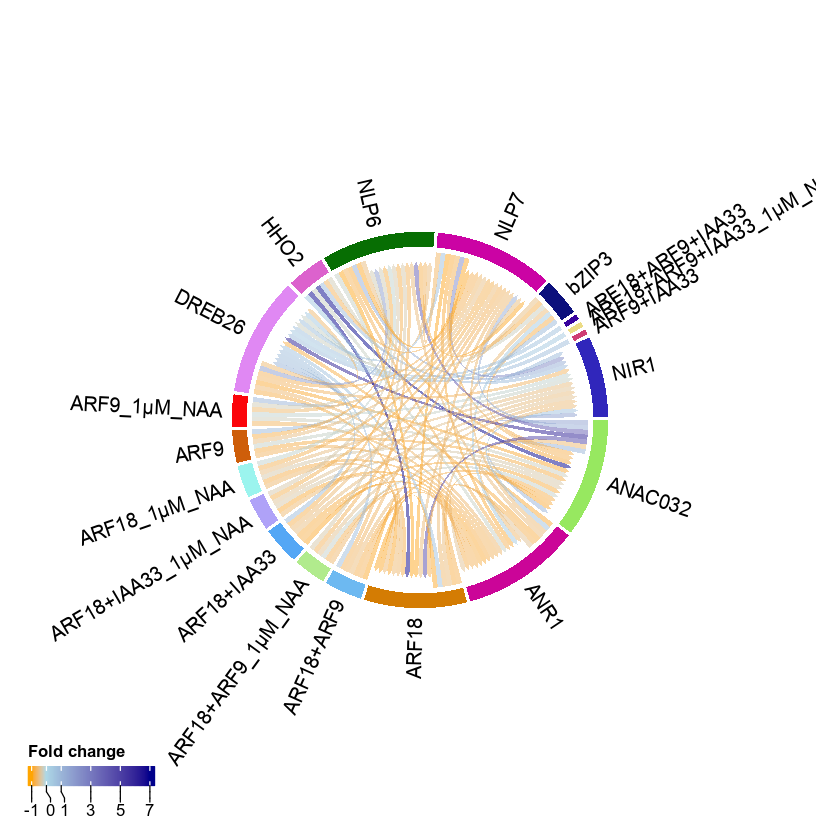

In [554]:
#make labels vertical
chordDiagram(df[1:2],col=df$color, directional=1,direction.type = c("arrows+diffHeight"), link.arr.type = "big.arrow", diffHeight = -mm_h(2),annotationTrack = "grid", preAllocateTracks = 1,) #direction.type = c("arrows+diffHeight")
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
  
}, bg.border = NA)


lgd_links = Legend(at = c(-1, 0, 1, 3,5, 7), col_fun = col_fun, 
    title_position = "topleft", title = "Fold change", direction = "horizontal")

lgd_list_horizontal = packLegend(lgd_links, 
    direction = "horizontal")
# draw(lgd_list_horizontal, y = unit(1, "npc") - circle_size, just = "top")
draw(lgd_list_horizontal, x = unit(6, "mm"), y = unit(5, "mm"), just = c("left", "bottom"))


In [555]:
#change outside segment colours to match those in previous figures in thesis, remove non-significant edges.
# size of each segment shows how many edges to and from
# if there are tf-promoter interactions i am most interested in then order them to be opposites at 0-180 degrees or 90-270 or o-90, just not next to each other 
#make all labels fit

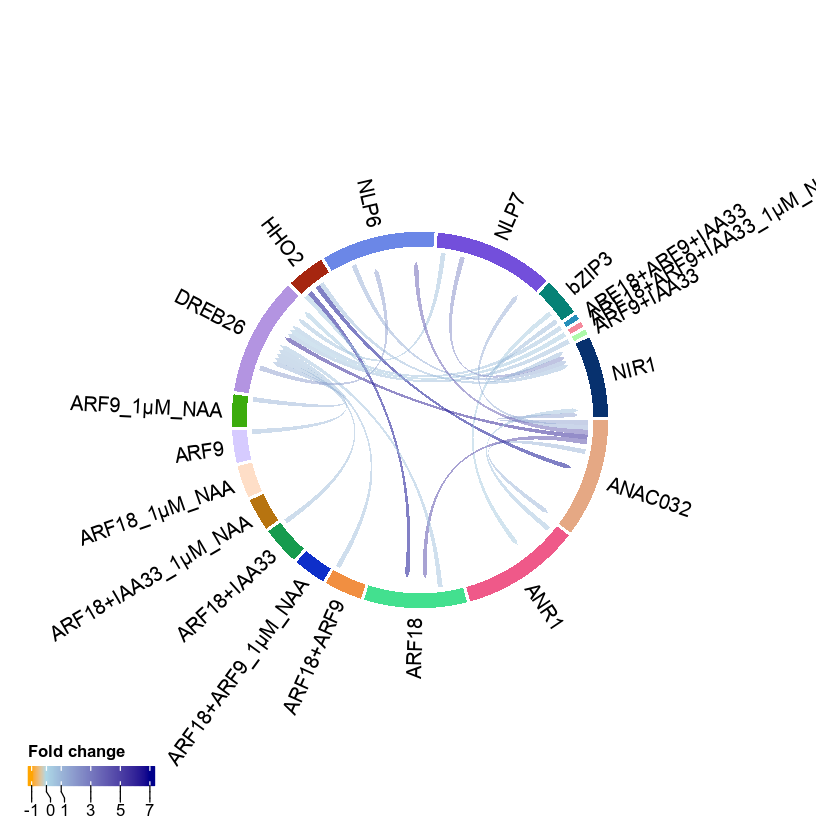

In [556]:
#show only activation
chordDiagram(df[1:2],col=df$color, link.visible = df$fold_change > 0, directional=1,direction.type = c("arrows+diffHeight"), link.arr.type = "big.arrow", diffHeight = -mm_h(2),annotationTrack = "grid", preAllocateTracks = 1,) #direction.type = c("arrows+diffHeight")
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
  
}, bg.border = NA)


lgd_links = Legend(at = c(-1, 0, 1, 3,5, 7), col_fun = col_fun, 
    title_position = "topleft", title = "Fold change", direction = "horizontal")

lgd_list_horizontal = packLegend(lgd_links, 
    direction = "horizontal")
# draw(lgd_list_horizontal, y = unit(1, "npc") - circle_size, just = "top")
draw(lgd_list_horizontal, x = unit(6, "mm"), y = unit(5, "mm"), just = c("left", "bottom"))



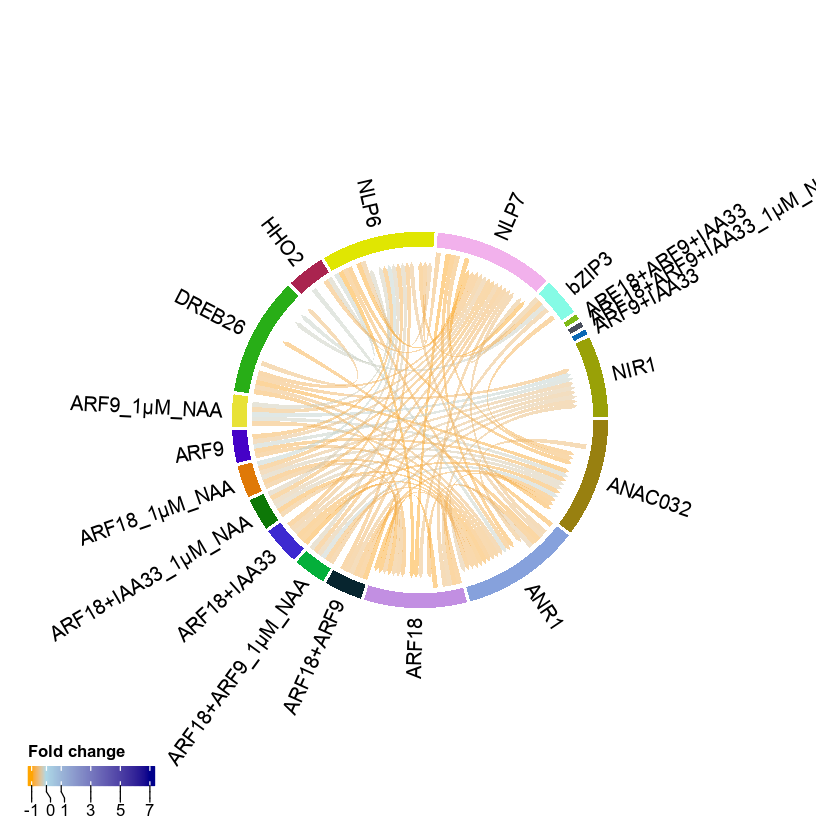

In [557]:
#show only repression
chordDiagram(df[1:2],col=df$color, link.visible = df$fold_change < 0, directional=1,direction.type = c("arrows+diffHeight"), link.arr.type = "big.arrow", diffHeight = -mm_h(2),annotationTrack = "grid", preAllocateTracks = 1,) #direction.type = c("arrows+diffHeight")
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
  
}, bg.border = NA)


lgd_links = Legend(at = c(-1, 0, 1, 3,5, 7), col_fun = col_fun, 
    title_position = "topleft", title = "Fold change", direction = "horizontal")

lgd_list_horizontal = packLegend(lgd_links, 
    direction = "horizontal")
# draw(lgd_list_horizontal, y = unit(1, "npc") - circle_size, just = "top")
draw(lgd_list_horizontal, x = unit(6, "mm"), y = unit(5, "mm"), just = c("left", "bottom"))
